In [5]:
import pandas as pd
listings = pd.read_csv('listings-masters-modeling.csv')
listings.head()

ParserError: ignored

In [3]:
listings.columns

Index(['id', 'listing_url', 'name', 'description', 'picture_url', 'hostid',
       'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'superhost', 'host_listings_count',
       'host_identity_verified', 'neighbourhoodid', 'borough_id', 'latitude',
       'longitude', 'room_typeid', 'accommodates', 'bathrooms_text',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

In [4]:
useless = ['id', 'listing_url', 'name', 'description', 'picture_url', 'hostid', 'host_since', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_identity_verified', 'bathrooms_text', 'amenities']
listings.drop(useless, axis=1, inplace=True)

In [5]:
listings.isnull().sum()

superhost                          9
host_listings_count                9
neighbourhoodid                    0
borough_id                         0
latitude                           0
longitude                          0
room_typeid                        0
accommodates                       0
bathrooms                         93
bedrooms                        3588
beds                             477
price                              0
minimum_nights                     0
maximum_nights                     0
availability_30                    0
availability_60                    0
availability_90                    0
availability_365                   0
number_of_reviews                  0
review_scores_rating           10108
review_scores_accuracy         10130
review_scores_cleanliness      10119
review_scores_communication    10128
review_scores_location         10145
review_scores_value            10145
instant_bookable                   0
dtype: int64

In [6]:
reviews_scores = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value']
listings.drop(reviews_scores, axis=1, inplace=True)


In [7]:
listings.head(15)

,superhost,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable
0,False,6.0,115,3,40.75362,-73.98377,1,2,1.0,NaN,1.0,175,30,1125,30,60,90,365,48,False
1,False,1.0,63,2,40.68514,-73.95976,1,3,1.0,1.0,3.0,74,1,730,12,31,61,307,375,False
2,False,1.0,52,2,40.68688,-73.95596,2,2,NaN,1.0,1.0,60,30,730,30,60,90,365,50,False
3,False,1.0,115,3,40.76468,-73.98315,2,2,1.0,1.0,1.0,65,2,14,0,0,0,0,474,False
4,True,1.0,52,2,40.68492,-73.95489,2,16,5.0,8.0,18.0,650,1,29,25,55,85,347,140,True
5,False,1.0,127,3,40.80178,-73.96723,2,1,1.0,1.0,1.0,75,2,14,0,0,0,0,118,False
6,True,3.0,93,2,40.66829,-73.98779,2,2,10.0,1.0,0.0,89,4,90,30,60,90,365,182,False
7,False,1.0,96,2,40.70837,-73.95352,1,3,1.0,NaN,1.0,109,30,730,0,0,0,253,181,False
8,False,0.0,102,3,40.80139,-73.94244,2,1,1.0,1.0,1.0,65,30,180,30,60,90,365,0,False
9,True,3.0,79,2,40.66932,-73.98982,1,3,1.0,1.0,2.0,136,4,180,17,47,77,352,176,False


In [8]:
listings.describe()

,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews
count,36914.000000,36923.000000,36923.000000,36923.000000,36923.000000,36923.000000,36923.000000,36830.000000,33335.000000,36446.000000,36923.000000,36923.000000,3.692300e+04,36923.000000,36923.000000,36923.000000,36923.000000,36923.000000
mean,20.812700,101.582347,2.698508,40.729724,-73.951458,1.517455,2.806245,1.162191,1.315554,1.533611,145.921187,23.674647,5.994967e+04,11.256290,25.202828,39.724995,134.103513,23.182298
std,138.766822,34.591498,0.746292,0.054451,0.047950,0.613163,1.849797,0.478115,0.715933,1.139186,268.388200,26.779132,1.117683e+07,12.869548,26.242548,39.766940,147.640898,48.066110
min,0.000000,1.000000,1.000000,40.508680,-74.239860,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,76.000000,2.000000,40.690600,-73.983990,1.000000,2.000000,1.000000,1.000000,1.000000,61.000000,4.000000,9.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,103.000000,3.000000,40.725690,-73.956120,1.000000,2.000000,1.000000,1.000000,1.000000,100.000000,30.000000,1.125000e+03,1.000000,12.000000,31.000000,77.000000,4.000000
75%,2.000000,124.000000,3.000000,40.762555,-73.934915,2.000000,4.000000,1.000000,1.000000,2.000000,159.000000,30.000000,1.125000e+03,27.000000,57.000000,87.000000,313.000000,21.000000
max,2470.000000,230.000000,5.000000,40.914720,-73.710870,4.000000,16.000000,15.500000,21.000000,42.000000,10000.000000,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000,748.000000


In [9]:
#replace nan w/ average to prevent skewed data
listings['bathrooms'] = listings['bathrooms'].fillna(1.16)
listings['bedrooms'] = listings['bedrooms'].fillna(1.32)
listings['beds'] = listings['beds'].fillna(1.53)


In [10]:
listings.isnull().sum()

superhost              9
host_listings_count    9
neighbourhoodid        0
borough_id             0
latitude               0
longitude              0
room_typeid            0
accommodates           0
bathrooms              0
bedrooms               0
beds                   0
price                  0
minimum_nights         0
maximum_nights         0
availability_30        0
availability_60        0
availability_90        0
availability_365       0
number_of_reviews      0
instant_bookable       0
dtype: int64

In [11]:
listings.head()

,superhost,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable
0,False,6.0,115,3,40.75362,-73.98377,1,2,1.00,1.32,1.0,175,30,1125,30,60,90,365,48,False
1,False,1.0,63,2,40.68514,-73.95976,1,3,1.00,1.00,3.0,74,1,730,12,31,61,307,375,False
2,False,1.0,52,2,40.68688,-73.95596,2,2,1.16,1.00,1.0,60,30,730,30,60,90,365,50,False
3,False,1.0,115,3,40.76468,-73.98315,2,2,1.00,1.00,1.0,65,2,14,0,0,0,0,474,False
4,True,1.0,52,2,40.68492,-73.95489,2,16,5.00,8.00,18.0,650,1,29,25,55,85,347,140,True


In [12]:
# only 9 rows of empty data --> drop
listings_cleaned = listings.dropna()

In [13]:
listings_cleaned.isnull().sum()

superhost              0
host_listings_count    0
neighbourhoodid        0
borough_id             0
latitude               0
longitude              0
room_typeid            0
accommodates           0
bathrooms              0
bedrooms               0
beds                   0
price                  0
minimum_nights         0
maximum_nights         0
availability_30        0
availability_60        0
availability_90        0
availability_365       0
number_of_reviews      0
instant_bookable       0
dtype: int64

In [14]:
#Do Correlation matrix

features_correlation = listings_cleaned.corr()
features_correlation

,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable
host_listings_count,1.000000,0.059862,0.062502,0.042684,-0.078780,-0.084246,-0.011909,-0.003982,-0.010029,-0.024931,0.045185,0.025191,-0.000754,-0.015347,0.001431,0.013150,0.090749,-0.061490,0.136190
neighbourhoodid,0.059862,1.000000,0.915563,0.227382,0.087374,-0.000614,-0.011933,-0.040195,-0.017725,-0.001528,0.040672,0.011320,0.003719,0.041840,0.050806,0.053687,0.046414,-0.023385,0.010799
borough_id,0.062502,0.915563,1.000000,0.252497,0.121060,0.018554,-0.012197,-0.034309,-0.025198,0.000469,0.035132,0.003880,0.002013,0.073650,0.081032,0.083250,0.071244,-0.009537,0.030969
latitude,0.042684,0.227382,0.252497,1.000000,0.078569,0.017902,-0.041948,-0.045988,-0.063850,-0.047559,0.027156,0.039233,0.005800,0.025226,0.022122,0.020257,0.022497,-0.039069,0.026004
longitude,-0.078780,0.087374,0.121060,0.078569,1.000000,0.151399,-0.009024,-0.002481,-0.005147,0.021868,-0.104927,-0.069141,-0.002920,0.072541,0.092683,0.102044,0.068412,0.075117,0.010521
room_typeid,-0.084246,-0.000614,0.018554,0.017902,0.151399,1.000000,-0.415599,-0.012352,-0.321643,-0.245661,-0.154870,-0.044594,-0.004395,0.064986,0.053610,0.044653,0.014521,0.001113,0.082818
accommodates,-0.011909,-0.011933,-0.012197,-0.041948,-0.009024,-0.415599,1.000000,0.354061,0.711465,0.724061,0.291194,-0.056188,-0.005124,0.075784,0.080615,0.084563,0.113898,0.070544,0.005587
bathrooms,-0.003982,-0.040195,-0.034309,-0.045988,-0.002481,-0.012352,0.354061,1.000000,0.464111,0.386429,0.214460,0.000614,-0.001801,0.056908,0.060373,0.061768,0.089133,-0.042168,0.020246
bedrooms,-0.010029,-0.017725,-0.025198,-0.063850,-0.005147,-0.321643,0.711465,0.464111,1.000000,0.708572,0.262160,-0.011285,0.000056,0.062488,0.065649,0.068727,0.090882,-0.000385,-0.031613
beds,-0.024931,-0.001528,0.000469,-0.047559,0.021868,-0.245661,0.724061,0.386429,0.708572,1.000000,0.214376,-0.038923,-0.002500,0.077507,0.081308,0.084691,0.105451,0.064346,-0.015652


In [15]:
features_correlation.to_csv("features_correlation")

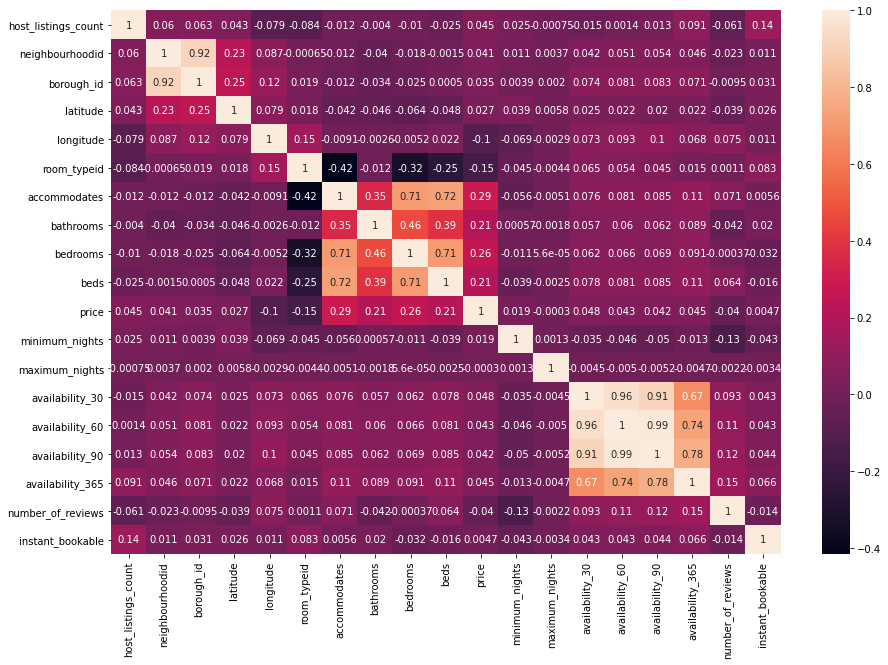

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(listings.corr(), annot= True)

In [17]:
listings.dtypes

superhost               object
host_listings_count    float64
neighbourhoodid          int64
borough_id               int64
latitude               float64
longitude              float64
room_typeid              int64
accommodates             int64
bathrooms              float64
bedrooms               float64
beds                   float64
price                    int64
minimum_nights           int64
maximum_nights           int64
availability_30          int64
availability_60          int64
availability_90          int64
availability_365         int64
number_of_reviews        int64
instant_bookable          bool
dtype: object

In [18]:
import numpy as np
encoded_data = pd.DataFrame({}) 

# Iterate over all attributes
for column in listings_cleaned.columns:
    # Check if column has type 'object'
    if listings_cleaned[column].dtype == np.dtype('object'):
        # use one-hot encoding for this column
        encoding = pd.get_dummies(listings_cleaned[column])
        # append expanded attribute to data frame
        encoded_data = pd.concat([encoded_data, encoding], axis=1)
    else:
        encoded_data = pd.concat([encoded_data, listings_cleaned[[column]]], axis=1)

encoded_data.head()

,False,True,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable
0,1,0,6.0,115,3,40.75362,-73.98377,1,2,1.00,1.32,1.0,175,30,1125,30,60,90,365,48,False
1,1,0,1.0,63,2,40.68514,-73.95976,1,3,1.00,1.00,3.0,74,1,730,12,31,61,307,375,False
2,1,0,1.0,52,2,40.68688,-73.95596,2,2,1.16,1.00,1.0,60,30,730,30,60,90,365,50,False
3,1,0,1.0,115,3,40.76468,-73.98315,2,2,1.00,1.00,1.0,65,2,14,0,0,0,0,474,False
4,0,1,1.0,52,2,40.68492,-73.95489,2,16,5.00,8.00,18.0,650,1,29,25,55,85,347,140,True


In [19]:
selected_features = encoded_data.drop("price", axis=1)
selected_features

,False,True,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable
0,1,0,6.0,115,3,40.75362,-73.98377,1,2,1.00,1.32,1.0,30,1125,30,60,90,365,48,False
1,1,0,1.0,63,2,40.68514,-73.95976,1,3,1.00,1.00,3.0,1,730,12,31,61,307,375,False
2,1,0,1.0,52,2,40.68688,-73.95596,2,2,1.16,1.00,1.0,30,730,30,60,90,365,50,False
3,1,0,1.0,115,3,40.76468,-73.98315,2,2,1.00,1.00,1.0,2,14,0,0,0,0,474,False
4,0,1,1.0,52,2,40.68492,-73.95489,2,16,5.00,8.00,18.0,1,29,25,55,85,347,140,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36918,1,0,10.0,111,3,40.73961,-73.97971,1,2,1.00,1.32,1.0,30,365,30,60,90,180,0,False
36919,1,0,0.0,127,3,40.78061,-73.98514,1,3,1.00,1.00,1.0,30,1125,23,53,83,83,0,False
36920,0,1,0.0,102,3,40.80054,-73.93340,4,1,1.00,1.00,0.0,1,28,26,56,86,176,0,False
36921,1,0,1.0,111,3,40.74033,-73.98242,1,2,1.00,1.00,1.0,4,90,23,53,83,83,0,False


In [20]:
y = listings_cleaned["price"]
X = selected_features

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train

,False,True,host_listings_count,neighbourhoodid,borough_id,latitude,longitude,room_typeid,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable
8182,1,0,1.0,1,1,40.85753,-73.86605,2,1,1.0,1.0,1.00,30,1125,29,59,89,364,9,False
431,1,0,1.0,103,3,40.72229,-73.97901,1,2,1.0,1.0,1.00,30,180,0,0,23,203,154,False
33001,1,0,13.0,148,4,40.75045,-73.82964,1,4,1.0,1.0,2.00,3,365,30,60,90,365,1,False
35061,1,0,1.0,126,3,40.77573,-73.94685,2,1,2.0,1.0,1.53,30,90,29,59,89,364,0,False
4039,1,0,0.0,109,3,40.75806,-73.99675,1,2,1.0,1.0,1.53,7,1125,10,40,70,160,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16858,0,1,2.0,74,2,40.64169,-73.96933,2,5,1.5,2.0,3.00,30,1125,0,0,0,0,95,False
6270,1,0,1.0,128,3,40.83663,-73.94502,2,2,1.0,1.0,1.00,30,1125,0,0,0,0,1,False
11291,0,1,1.0,62,2,40.67677,-73.99809,2,4,1.0,1.0,3.00,2,14,22,48,71,157,272,False
860,0,1,1.0,108,3,40.82392,-73.94205,2,2,1.0,1.0,1.00,30,1125,0,9,39,314,189,False


In [22]:
print(X_train.shape, y_train.shape)

(27685, 20) (27685,)


In [23]:
print(X_test.shape, y_test.shape)

(9229, 20) (9229,)


In [1]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

NameError: ignored

In [1]:
model.score(X_test, y_test)

NameError: ignored